In [1]:
using EnvelopeApproximation
using EnvelopeApproximation.BubbleBasics
using EnvelopeApproximation.BubblesEvolution
using EnvelopeApproximation.StressEnergyTensor
import EnvelopeApproximation.GravitationalPotentials: ψ as _ψ
import LinearAlgebra: norm
using Plots


# Setting up the bubbles

In [2]:
d = 1.
ΔV = 1.
nucleations = [(time=0., site=Point3(0., 0., -d / 2)), (time=0., site=Point3(0., 0., d / 2))]
η_max = 15.
ηs = LinRange(0.5, η_max, 30) |> collect
snapshot = BubblesSnapShot(nucleations, η_max)

BubblesSnapShot(@NamedTuple{time::Float64, site::Point3}[(time = 0.0, site = Point3([0.0, 0.0, -0.5])), (time = 0.0, site = Point3([0.0, 0.0, 0.5]))], 15.0, EnvelopeApproximation.BubblesEvolution.speed_of_light_profile)

# Setting up the Ks

In [3]:
k_vecs = [Vec3(0., 1., 1.)]

1-element Vector{StaticArraysCore.SVector{3, Float64}}:
 [0.0, 1.0, 1.0]

In [4]:
k_vecs

1-element Vector{StaticArraysCore.SVector{3, Float64}}:
 [0.0, 1.0, 1.0]

# Computing Numerically

In [5]:
ψ = _ψ(k_vecs, snapshot, ηs, 10, 10; rtol=1e-2)

30×1 Matrix{ComplexF64}:
                 0.0 + 0.0im
   4.797936600231277 - 2.1512305426473238e-17im
   25.34744100580724 - 7.259073196642152e-16im
   66.70153596807032 - 1.5694645194848234e-11im
  113.39382538324594 - 6.277432567810326e-11im
  127.93264951883907 - 1.2531863484871738e-10im
   68.33775040894676 - 1.8740239308138322e-10im
  -79.34231563426798 - 2.605767314105652e-10im
 -271.55999735234155 - 3.55830812236967e-10im
 -396.94298318479457 - 4.6107203163290073e-10im
                     ⋮
   131.4421427626905 - 3.902035736391924e-9im
    1284.93548341391 - 4.66037242847546e-9im
  1524.4861364968942 - 5.418691389652501e-9im
   566.0019217632503 - 6.175196453480827e-9im
 -1292.9247178458656 - 6.9290553968249895e-9im
 -3243.4828148452348 - 7.683013267564327e-9im
  -4321.071294893833 - 8.444230326436252e-9im
 -3895.9066614221456 - 9.217921287505508e-9im
  -2053.536734964807 - 9.997842763466082e-9im

In [6]:
ψ

30×1 Matrix{ComplexF64}:
                 0.0 + 0.0im
   4.797936600231277 - 2.1512305426473238e-17im
   25.34744100580724 - 7.259073196642152e-16im
   66.70153596807032 - 1.5694645194848234e-11im
  113.39382538324594 - 6.277432567810326e-11im
  127.93264951883907 - 1.2531863484871738e-10im
   68.33775040894676 - 1.8740239308138322e-10im
  -79.34231563426798 - 2.605767314105652e-10im
 -271.55999735234155 - 3.55830812236967e-10im
 -396.94298318479457 - 4.6107203163290073e-10im
                     ⋮
   131.4421427626905 - 3.902035736391924e-9im
    1284.93548341391 - 4.66037242847546e-9im
  1524.4861364968942 - 5.418691389652501e-9im
   566.0019217632503 - 6.175196453480827e-9im
 -1292.9247178458656 - 6.9290553968249895e-9im
 -3243.4828148452348 - 7.683013267564327e-9im
  -4321.071294893833 - 8.444230326436252e-9im
 -3895.9066614221456 - 9.217921287505508e-9im
  -2053.536734964807 - 9.997842763466082e-9im

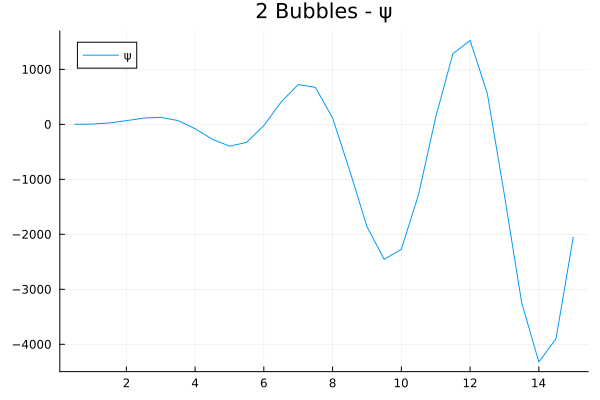

"/home/ben/.julia/dev/EnvelopeApproximation/scripts/gravitational_potentials/gravitational_potential.png"

In [8]:
p = plot(ηs, ψ .|> real, label="ψ", title="2 Bubbles - ψ")
display(p)
savefig("gravitational_potential.png")

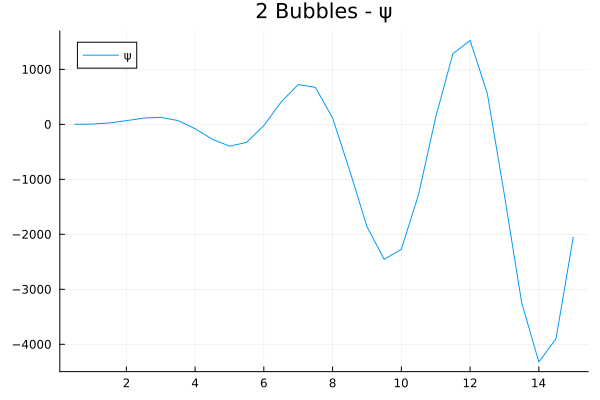

In [9]:
p = plot(ηs, ψ .|> real, label="ψ", title="2 Bubbles - ψ")
display(p)

# Saving the data

In [10]:
using JLD2
data = Dict("ks" => k_vecs, "ηs" => ηs, "ψ" => _ψ)

jldsave("gravitational_potential_fixed_k_varying_eta.json"; ψ_data = data)

┌ Warning: Attempting to store typeof(EnvelopeApproximation.GravitationalPotentials.ψ).
│  Function types cannot be propertly stored in JLD2 files.
│  Loading may yield unexpected results.
└ @ JLD2 /home/ben/.julia/packages/JLD2/JHhTf/src/data/writing_datatypes.jl:631
┌ Warning: Attempting to store typeof(EnvelopeApproximation.GravitationalPotentials.ψ).
│  Function types cannot be propertly stored in JLD2 files.
│  Loading may yield unexpected results.
└ @ JLD2 /home/ben/.julia/packages/JLD2/JHhTf/src/data/writing_datatypes.jl:631
